In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

For Generating Sinusoidal signal

In [20]:
def generate_signal(length, freqs, amplitudes):
    t = np.linspace(0, 2 * np.pi, length)
    signal = np.zeros(length)
    for i in range(len(freqs)):
        signal += amplitudes[i] * np.sin(freqs[i] * t)
    return t, signal

Removing N% of sample

In [21]:
def remove_samples(signal, N):
    length = len(signal)
    indices = random.sample(range(length), int(N * length / 100))
    corrupted_signal = signal.copy()
    for idx in indices:
        corrupted_signal[idx] = np.nan
    return corrupted_signal, indices

Plotting

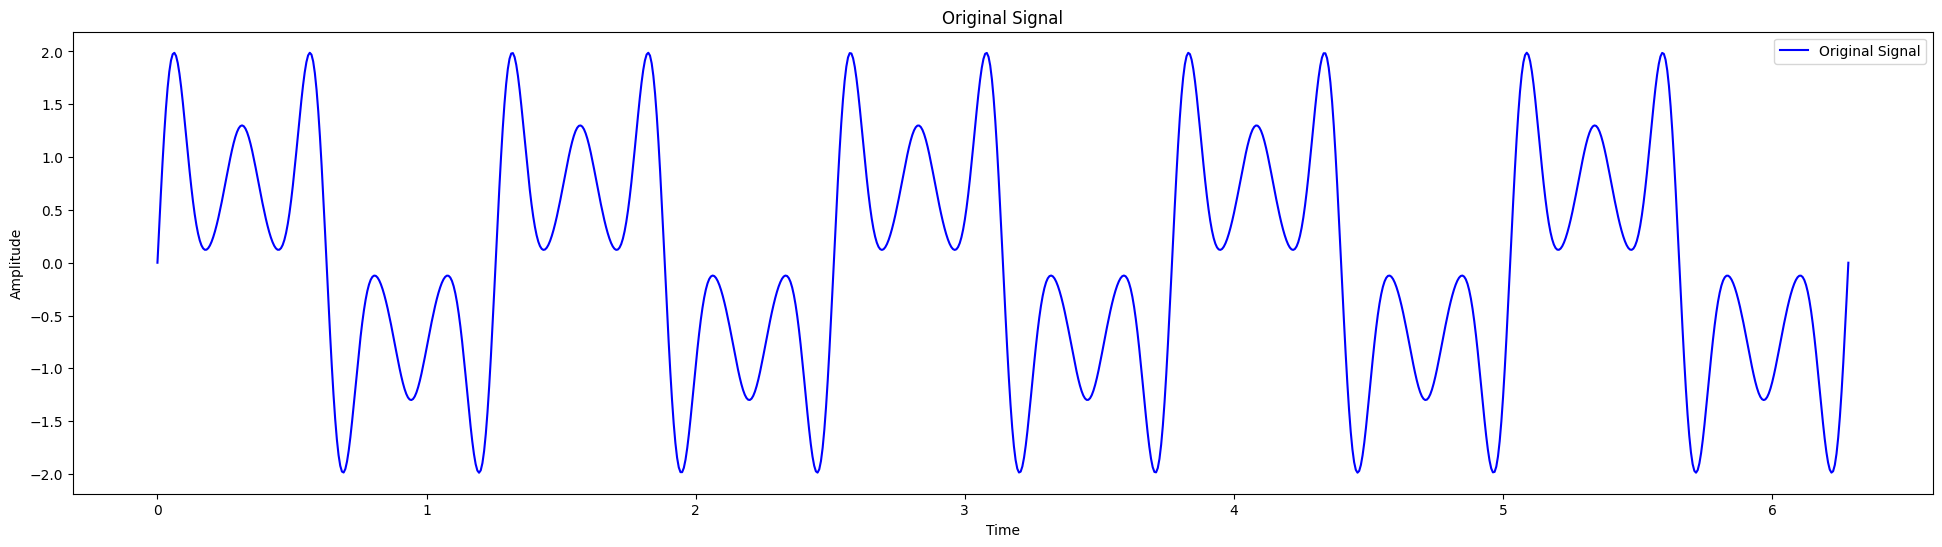

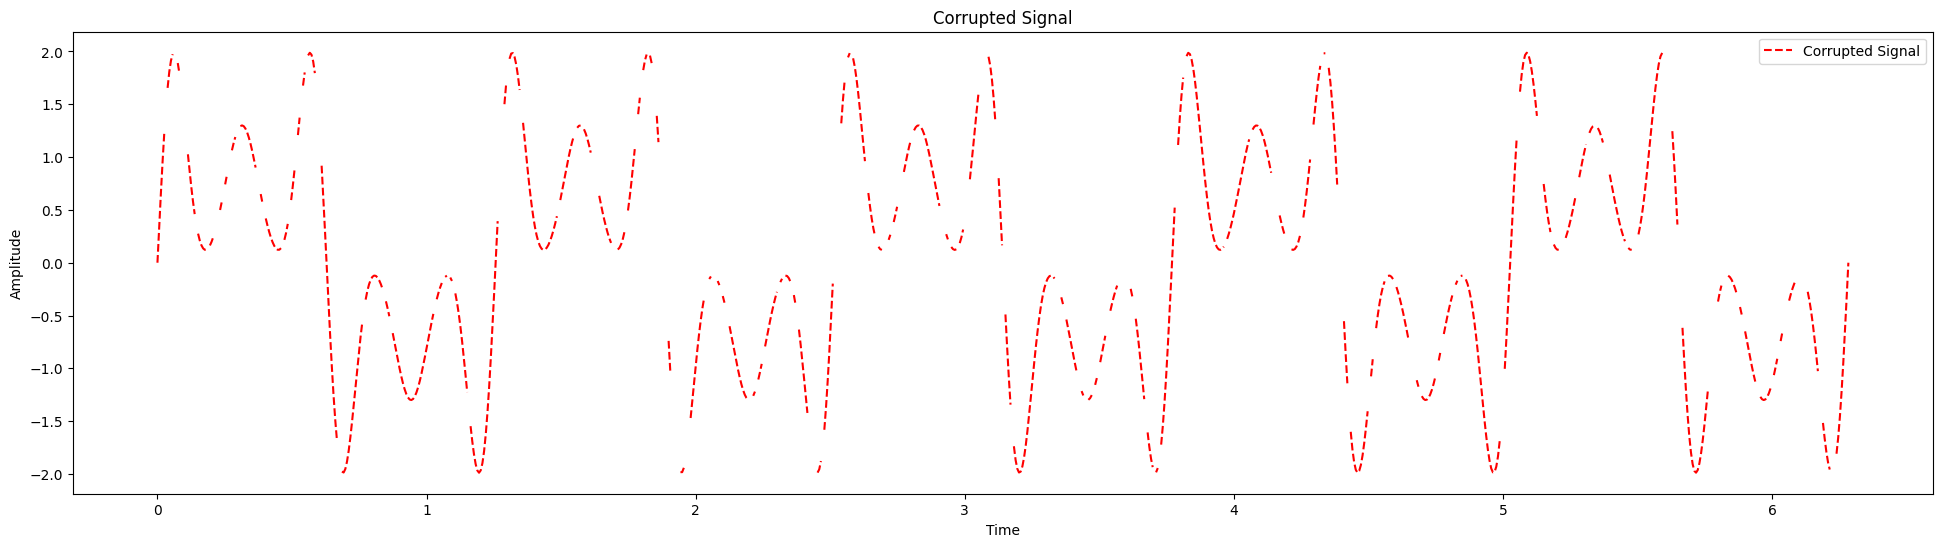

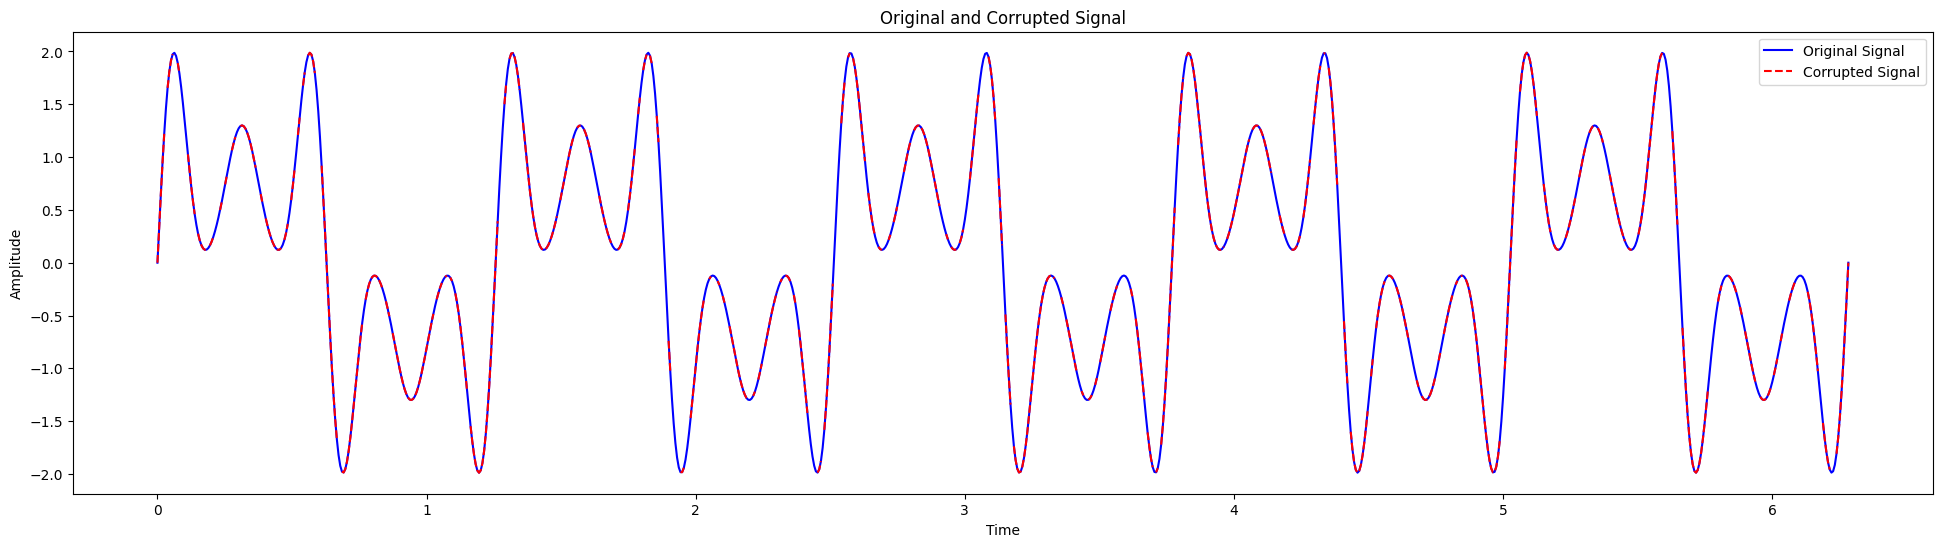

In [22]:

length = 1000
freqs = [5, 15, 25, 35, 45]
amplitudes = [1, 0.5, 1, 0.3, 0.1]
N = 20  #   Customize it according to your need


t, signal = generate_signal(length, freqs, amplitudes)
corrupted_signal, missing_indices = remove_samples(signal, N)

# plot-1
plt.figure(figsize=(24, 6))
plt.plot(t, signal, label='Original Signal', color='blue')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal")
plt.show()

# plot-2
plt.figure(figsize=(24, 6))
plt.plot(t, corrupted_signal, label='Corrupted Signal', linestyle='--', color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Corrupted Signal")
plt.show()

# plot-3
plt.figure(figsize=(24, 6))
plt.plot(t, signal, label='Original Signal', color='blue')
plt.plot(t, corrupted_signal, label='Corrupted Signal', linestyle='--', color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original and Corrupted Signal")
plt.show()

MEAN SAMPLING

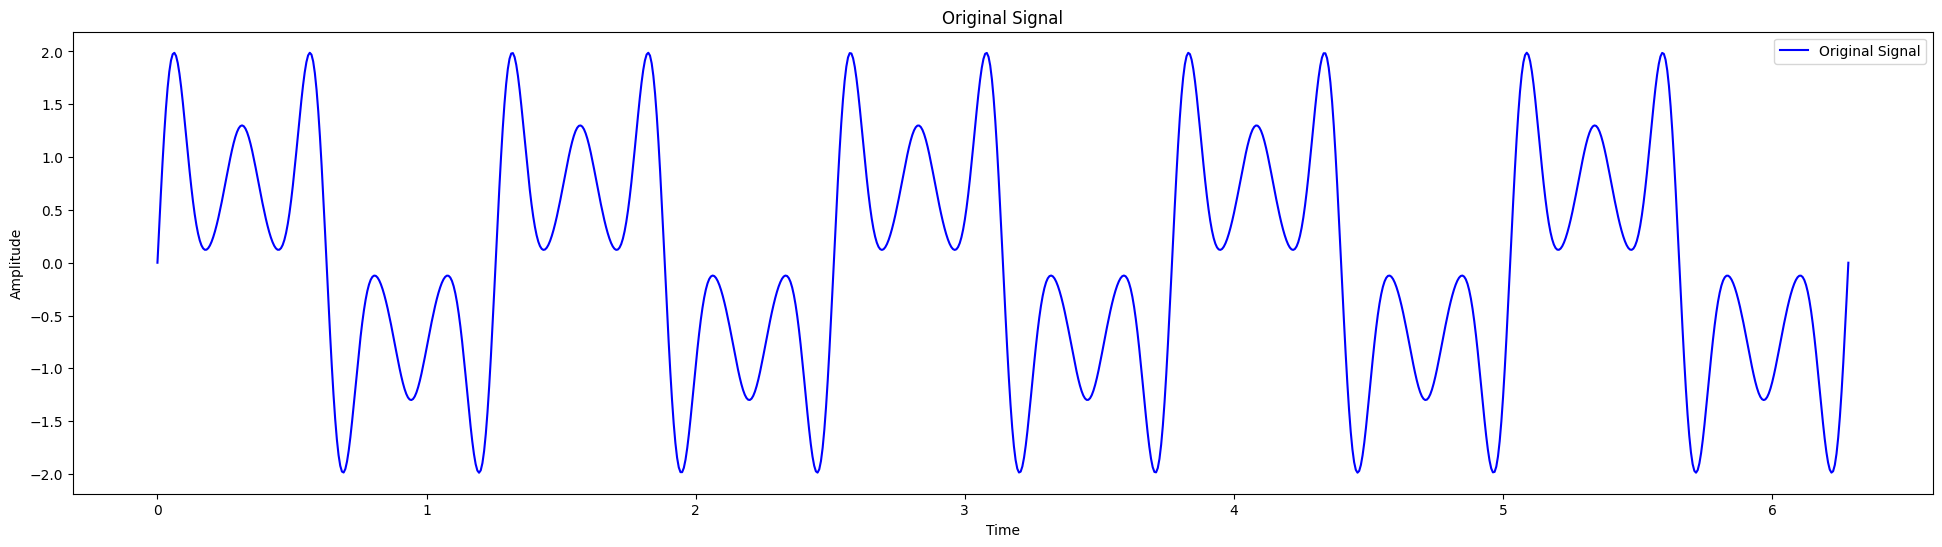

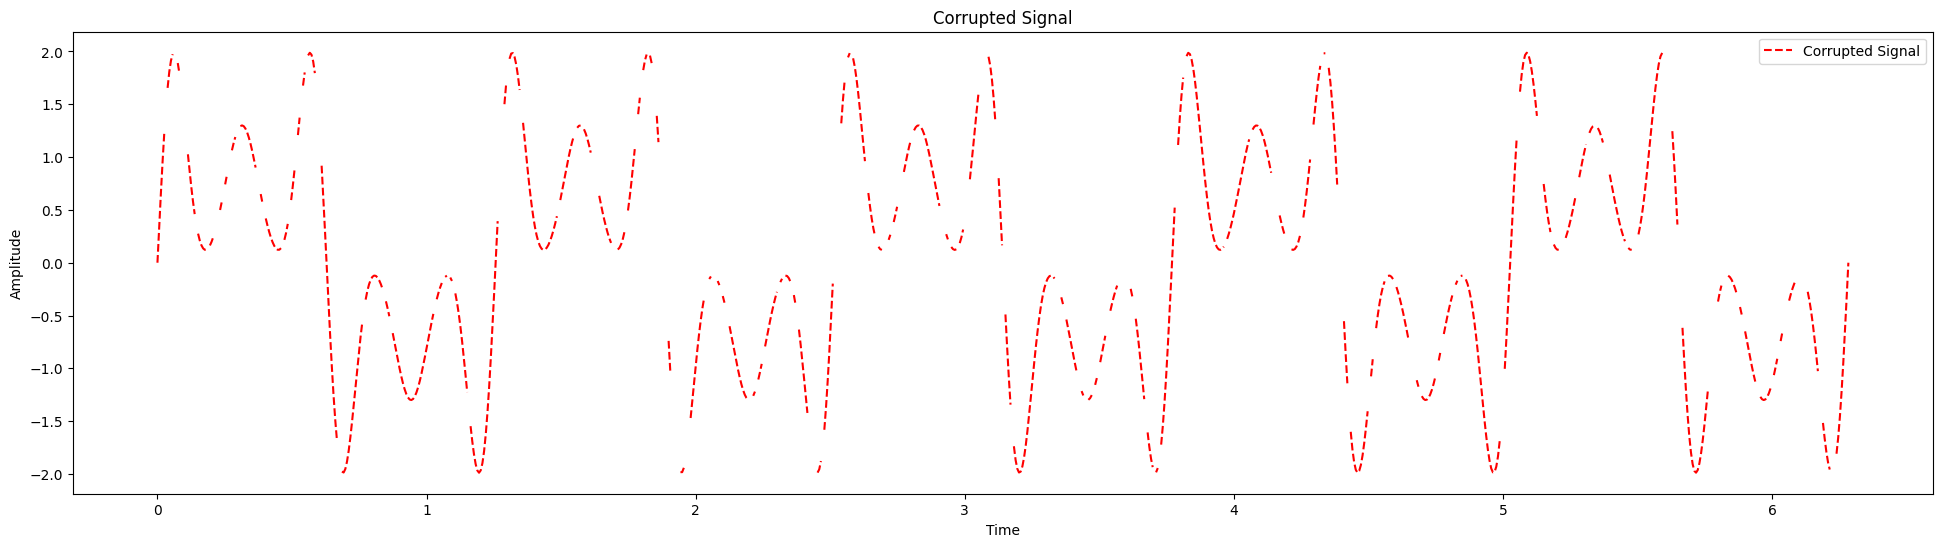

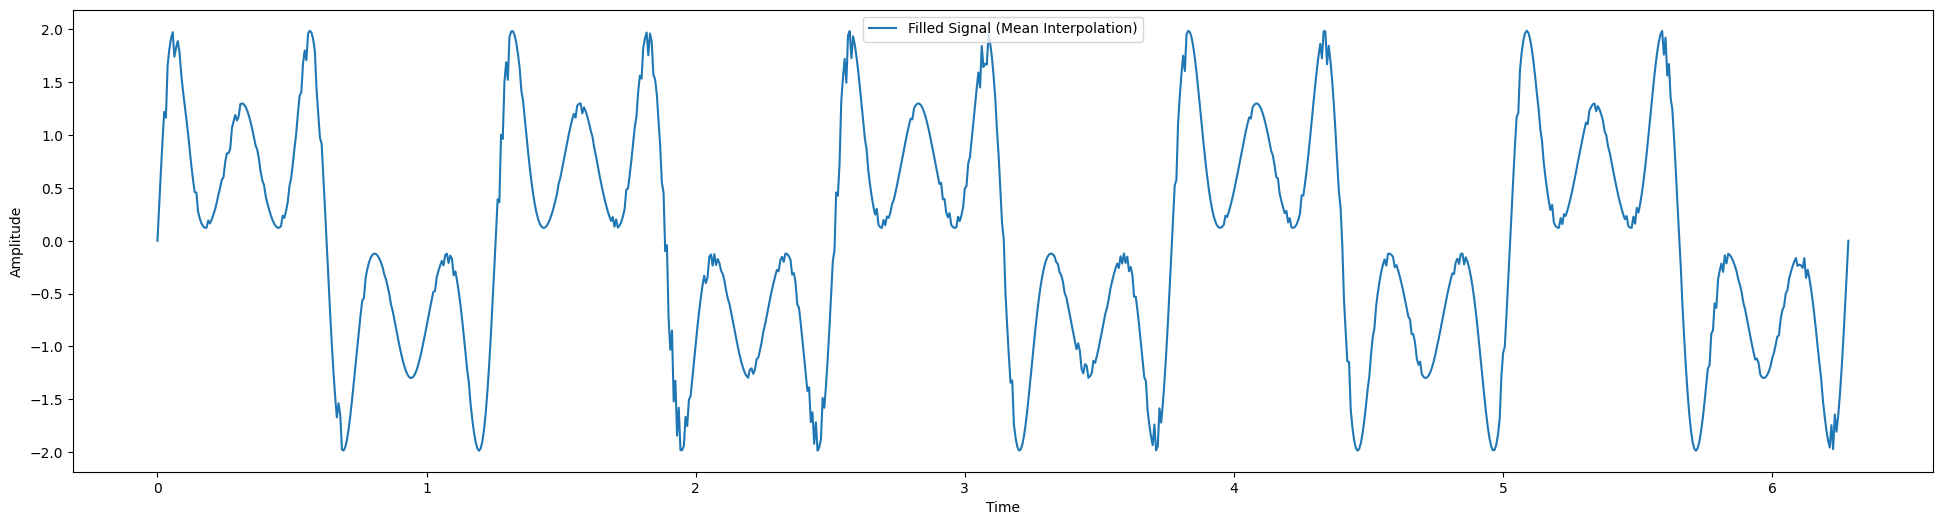

In [23]:
def mean_interpolation(signal, window_size):
    signal_filled = signal.copy()
    for i in range(len(signal)):
        if np.isnan(signal_filled[i]):
            start = max(0, i - window_size)
            end = min(len(signal), i + window_size + 1)
            neighbors = signal_filled[start:i].tolist() + signal_filled[i+1:end].tolist()
            neighbors = [x for x in neighbors if not np.isnan(x)]
            if neighbors:
                signal_filled[i] = sum(neighbors) / len(neighbors)
    return signal_filled

window_size = 5
filled_signal_mean = mean_interpolation(corrupted_signal, window_size)

# plot-1
plt.figure(figsize=(24, 6))
plt.plot(t, signal, label='Original Signal', color='blue')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal")
plt.show()

# plot-2
plt.figure(figsize=(24, 6))
plt.plot(t, corrupted_signal, label='Corrupted Signal', linestyle='--', color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Corrupted Signal")
plt.show()

# plot-3
plt.figure(figsize=(24, 6))
plt.plot(t, filled_signal_mean, label='Filled Signal (Mean Interpolation)')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

GAUSSIAN WINDOW

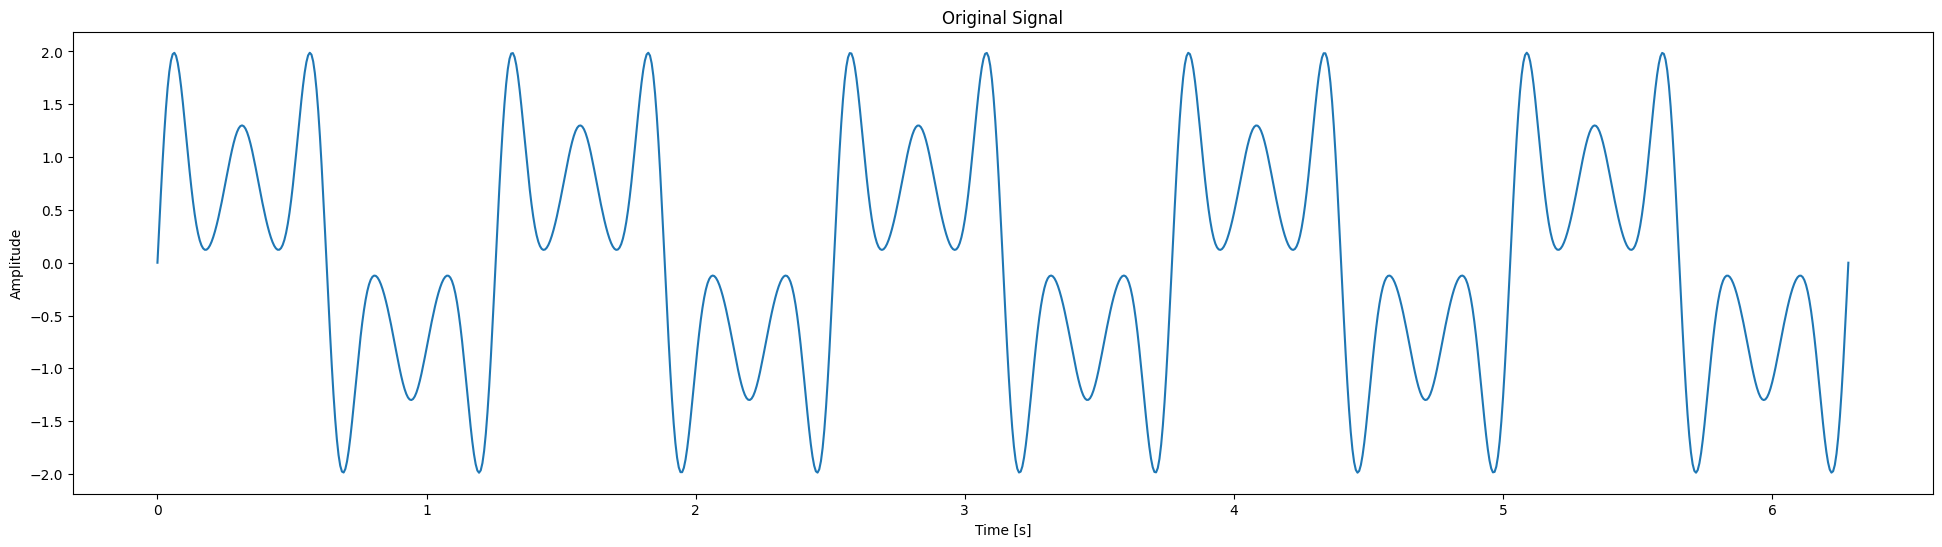

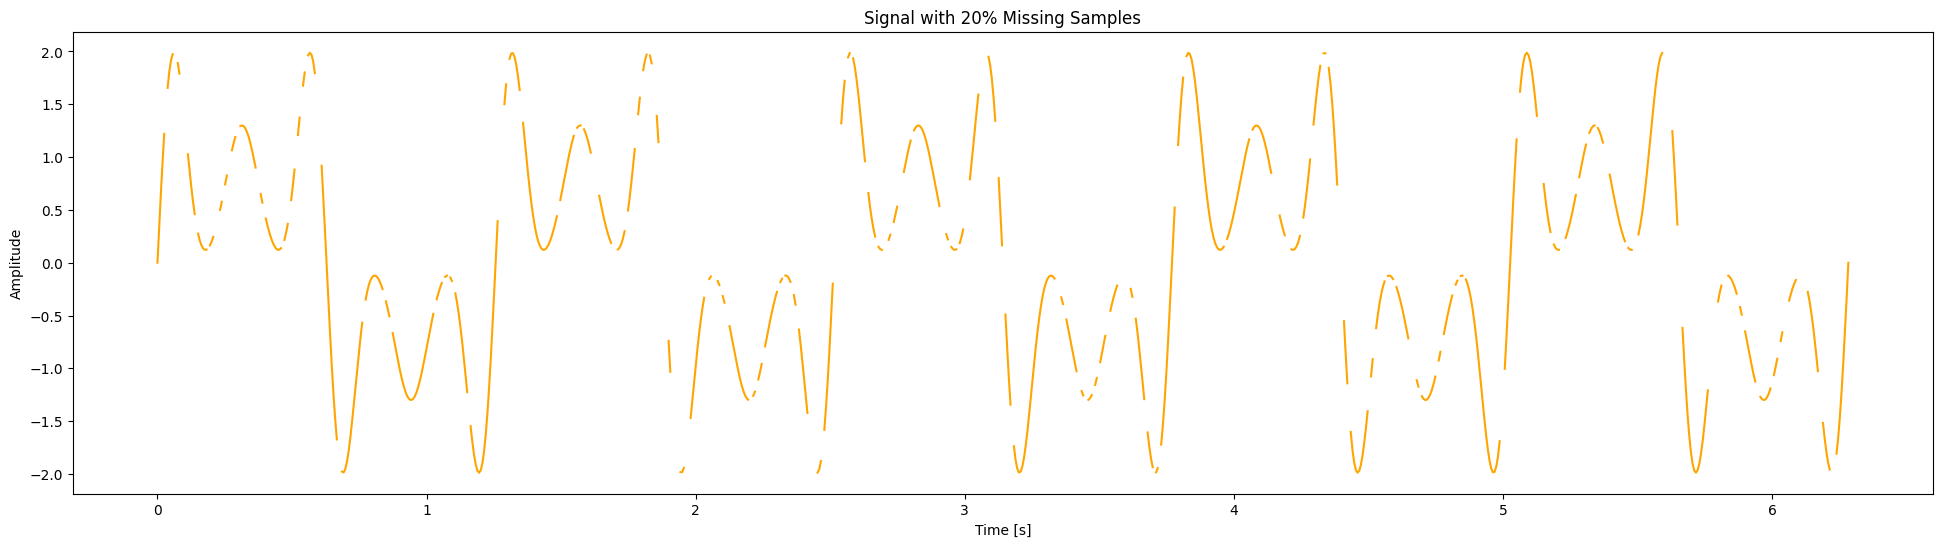

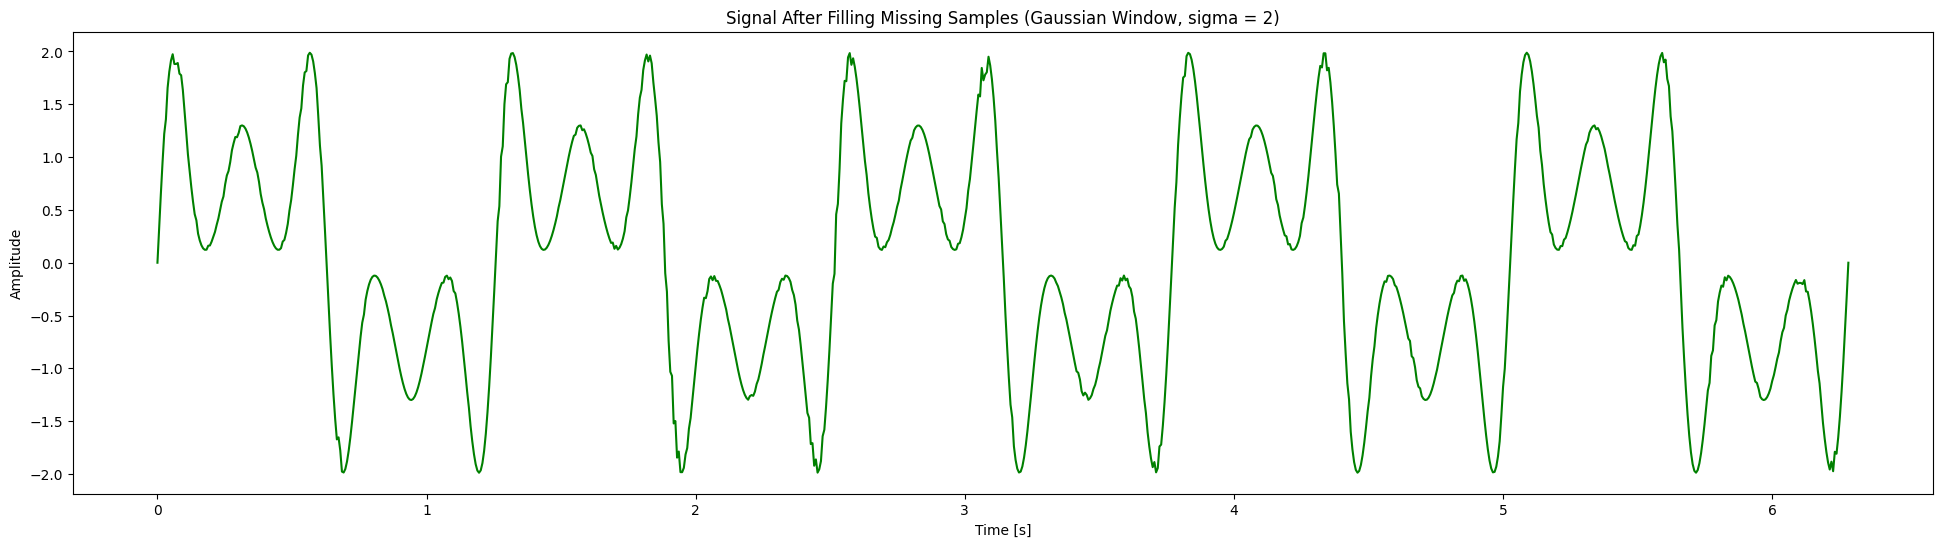

In [24]:
def fill_missing_with_gaussian(signal, window_size, sigma):
    filled_signal = signal.copy()
    
    for i in range(len(filled_signal)):
        if np.isnan(filled_signal[i]):
            
            start = max(0, i - window_size)
            end = min(len(filled_signal), i + window_size + 1)
            
            neighboring_values = filled_signal[start:end]
            
            actual_window = np.arange(start, end) - i
            actual_weights = norm.pdf(actual_window, scale=sigma)
            
            valid_mask = ~np.isnan(neighboring_values)
            valid_neighbors = neighboring_values[valid_mask]
            valid_weights = actual_weights[valid_mask]
            
            if len(valid_neighbors) > 0:
                weighted_mean = np.sum(valid_neighbors * valid_weights) / np.sum(valid_weights)
                filled_signal[i] = weighted_mean
    
    return filled_signal

window_size = 5  
sigma = 2  

signal_filled = fill_missing_with_gaussian(corrupted_signal, window_size, sigma)

# Plot 1 
plt.figure(figsize=(24,6))
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# Plot 2
plt.figure(figsize=(24,6))
plt.plot(t, corrupted_signal, label='Signal with Missing Samples', color='orange')
plt.title(f'Signal with {N}% Missing Samples')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# Plot 3
plt.figure(figsize=(24,6))
plt.plot(t, signal_filled, label='Filled Signal', color='green')
plt.title(f'Signal After Filling Missing Samples (Gaussian Window, sigma = {sigma})')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

Using linear interpolation

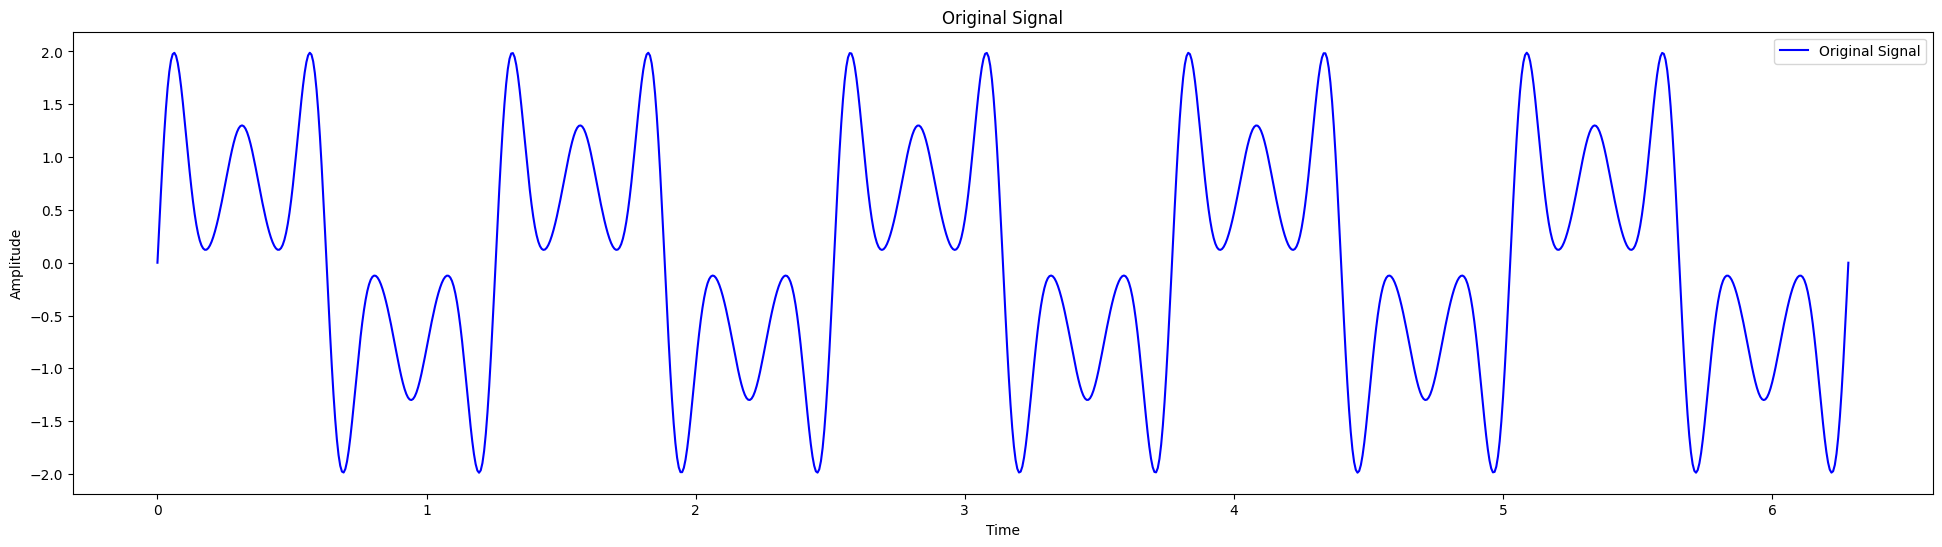

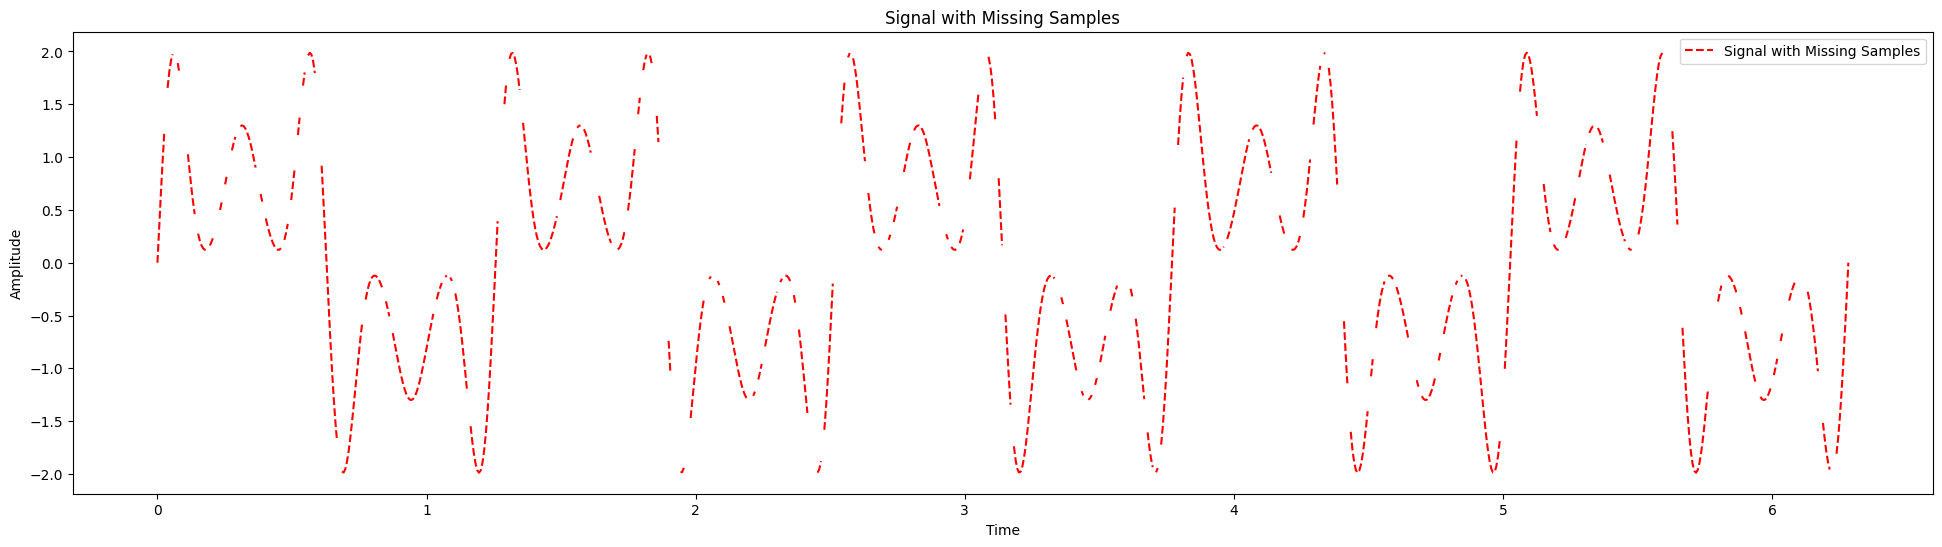

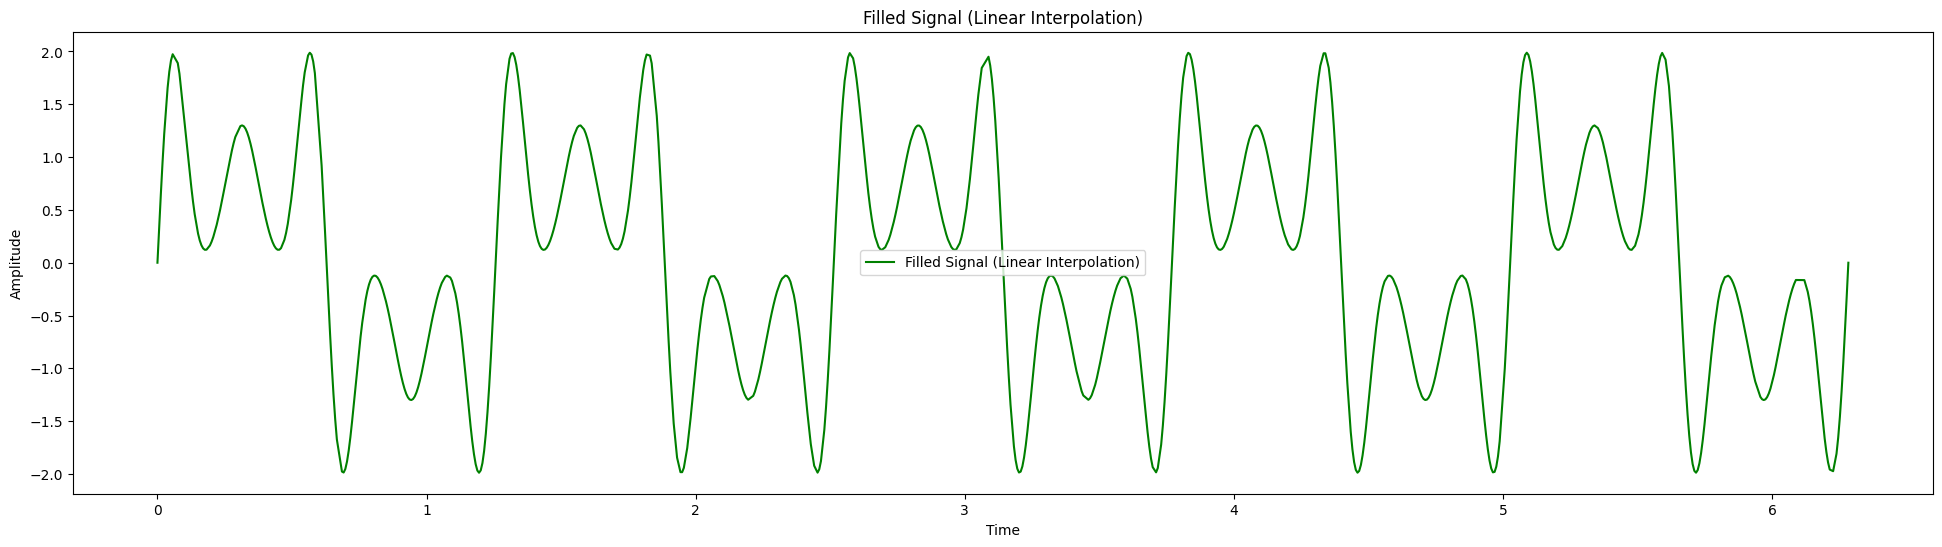

In [25]:
signal_with_missing = signal.copy()
signal_with_missing[missing_indices] = np.nan

def fill_by_linear_interpolation(signal):
    signal_filled = np.copy(signal)
    
    for idx in np.where(np.isnan(signal_filled))[0]:
        left_idx = np.max(np.where(~np.isnan(signal_filled[:idx]))[0])
        
        valid_right = np.where(~np.isnan(signal_filled[idx:]))[0]
        
        if len(valid_right) > 0:
            right_idx = np.min(valid_right) + idx
        else:
            print(f"No valid right index for position {idx}.")
            continue
        
        x = [left_idx, right_idx]
        y = [signal_filled[left_idx], signal_filled[right_idx]]
        slope = (y[1] - y[0]) / (x[1] - x[0])
        intercept = y[0] - slope * x[0]
        
        signal_filled[idx] = slope * idx + intercept
        
    return signal_filled


signal_filled_linear = fill_by_linear_interpolation(signal_with_missing)

# Plot 1
plt.figure(figsize=(24, 6))
plt.plot(t, signal, label='Original Signal', color='blue')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal")
plt.show()

# Plot 2
plt.figure(figsize=(24, 6))
plt.plot(t, signal_with_missing, label='Signal with Missing Samples', linestyle='--', color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal with Missing Samples")
plt.show()

# Plot 3
plt.figure(figsize=(24, 6))
plt.plot(t, signal_filled_linear, label='Filled Signal (Linear Interpolation)', color='green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Filled Signal (Linear Interpolation)")
plt.show()